In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['shinzo-abe-japanese-prime-minister-twitter-nlp', 'ja-nlp']


In [110]:
!pip install WordCloud

In [70]:
import WordCloud

ModuleNotFoundError: No module named 'WordCloud'

In [ ]:
!pip install openpyxl

In [32]:
import openpyxl

In [ ]:
!pip install nltk

In [ ]:
!pip install spacy

In [33]:
import spacy


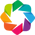

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -2]
[nltk_data]     Name or service not known>


In [3]:
import os
import datetime
import codecs
import re
import warnings
warnings.filterwarnings('ignore')
import pkg_resources, imp
imp.reload(pkg_resources)
import numpy as np
import pandas as pd
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from matplotlib import pyplot as plt
# import neologdn
import nltk
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
from spacy.lang.ja import Japanese
import regex
from wordcloud import WordCloud
import collections
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
# import shap
# shap.initjs()
# import oseti

In [34]:
import os
os.getcwd()
print(os.getcwd())

/kaggle/working


In [2]:
import re
import itertools
import unicodedata
from janome.tokenizer import Tokenizer
import networkx as nx
from scipy.spatial import distance
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Droid Sans Japanese'

In [53]:
import pandas as pd

# Load the dataset into a pandas dataframe.
# df = pd.read_csv("./cola_public/raw/in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])
col_list=[10,11,15,16]
df = pd.read_excel("/kaggle/input/ja-nlp/ja_slide9_data.xlsx", usecols=col_list,names=['sentence1','sentence2','sentence3','sentence4'])
# col_list=[15]
# df = pd.read_excel("/kaggle/input/ja-nlp/ja_slide9_data.xlsx", usecols=col_list,names=['sentence'])
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(5)

Number of training sentences: 133



sentence1  \
32                                改めてDRRを訴求し、腹落ちさせたい。   
26  開発の軌跡・薬剤特性訴求コンテンツを中心にTG-Dr.の処方基準、処方意向等を確認するところ...   
86                                    者さんのために DSP/リーフ   
36                         説明会時はMust,APDでの使用を工夫して進めたい   
7       患者さんのためにDSP/リーフにて、日頃お越しになられている患者さんを思い浮かべていただく   

                                            sentence2  \
32                                                NaN   
26                                                NaN   
86                        HCPのニーズに合わせた展開が出来る内容を要望します。   
36                                     もっと早く受けたい内容でした   
7   ARISTOTLE試験の有効性エンドポイントには何故出血性脳卒中が含まれているのでしょうか、...   

                                            sentence3              sentence4  
32                                     副作用対策スライドが欲しい。                    NaN  
26                           資材を予定通りリリースしていただければ幸いです。                    NaN  
86  対抗品が選択されている理由の把握と対策が有効ではない。専門医での評価を高める対策をとることが...                    NaN  
36                                        坑コリン剤比較について  男性OABへの使用を再度訴えかけていきたい  
7                           安全性に対する質問へのオブジェクションハンドリング                    NaN

In [63]:
# tweets

In [64]:
# df.iloc[:,0].as_matrix()

In [67]:
# tweets = df['sentence'].as_matrix()
# tweets=df['sentence1'].as_matrix()+df['sentence2'].as_matrix()+df['sentence3'].as_matrix()+df['sentence4'].as_matrix()
tweets = df['sentence1'].as_matrix()
regex = u'[^\u3041-\u3093\u30A1-\u30F4\u4E00-\u9FCB]'
t = Tokenizer()

tweet_words = []
for tweet in tweets:
    tweet = re.sub(regex, ' ', tweet)
    words = []
    for token in t.tokenize(tweet):
        speechs = token.part_of_speech.split(',')
        if ('名詞' in speechs) or ('形容詞' in speechs) or ('動詞' in speechs):
            if len(token.surface) > 1:
                words.append(token.surface)
    tweet_words.append(words)

len(tweet_words)

133

In [68]:
# tweet_words

In [69]:
word_cnt = {}
for words in tweet_words:
    for word in words:
        if word not in word_cnt:
            word_cnt[word] = 1
        else:
            word_cnt[word] += 1
    
word_cnt_df = pd.DataFrame({'word': [k for k in word_cnt.keys()], 'cnt': [v for v in word_cnt.values()]})
len(word_cnt_df)

361

In [7]:
# word_cnt_df

In [8]:
word_cnt_df[['cnt']].describe()

cnt
count  350.000000
mean     2.008571
std      2.346108
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max     18.000000

In [25]:
tmp = word_cnt_df[word_cnt_df['cnt'] > 3]
# tmp.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(15,7), legend=False)
tmp.sort_values(by='cnt', ascending=True).plot.barh( x='word', y='cnt',figsize=(7,15))
plt.show()

### 两个词的

In [10]:
# tweet_words
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

one_word_list=flatten_list(tweet_words)
# print(one_word_list)

In [11]:
from itertools import permutations
# list_test=keysList
word_2=permutations(one_word_list,2)
two_unit_list = [''.join(i) for i in word_2]
# print(two_unit_list)

In [12]:
sentences = df.sentence.values
print(sentences[5])
col15_sentence=[]
for sen in sentences:
    col15_sentence.append(sen)
col15_sentence_text='.'.join(col15_sentence)

def unit2_dictionary(str,word_list):
    counts = dict()
    for word in word_list:
        dic=str.count(word)
        # counts[word] =dic
        if dic!=0:
            counts[word] =dic
    return counts
unit2_dic=unit2_dictionary(col15_sentence_text,two_unit_list)
# print(unit2_dic)

しっかり話し込みが出来た先生には、TOVの効果面や安全性(FORTA等)はお伝えできた。課題は、面会が困難で短時間面会Drや不面Drへの対策が不十分なこと。


In [13]:
dict1 = unit2_dic
sorted_dict = {}
sorted_keys = sorted(dict1, key=dict1.get,reverse=True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = dict1[w]

# print(sorted_dict) 

In [14]:
two_word_cnt_df = pd.DataFrame({'two_word': [k for k in sorted_dict.keys()], 'two_word_freq': [v for v in sorted_dict.values()]})
len(two_word_cnt_df)
two_word_cnt_df.head(8)

two_word  two_word_freq
0    インサイト             13
1     製品知識              5
2     患者さん              3
3     いる先生              2
4     すること              2
5     臨床試験              2
6     活動膀胱              2
7    出来るよう              2

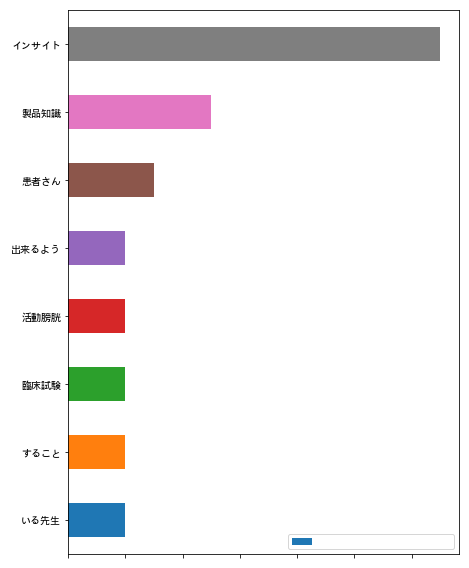

In [32]:
tmp2 = two_word_cnt_df[two_word_cnt_df['two_word_freq'] > 1]
# tmp2.sort_values(by='two_word_freq', ascending=False).plot(kind='bar', x='two_word', y='two_word_freq', figsize=(15,7), legend=False)
tmp2.sort_values(by='two_word_freq', ascending=True).plot.barh( x='two_word', y='two_word_freq',figsize=(7,10),legend=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9bb5e6550>,
      dtype=object)

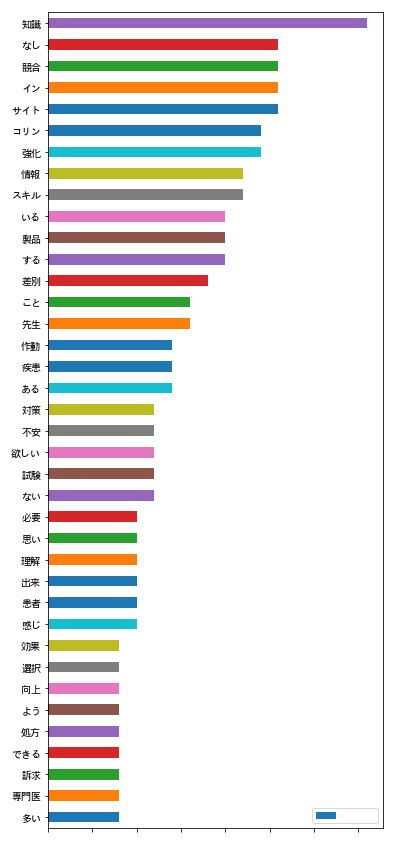

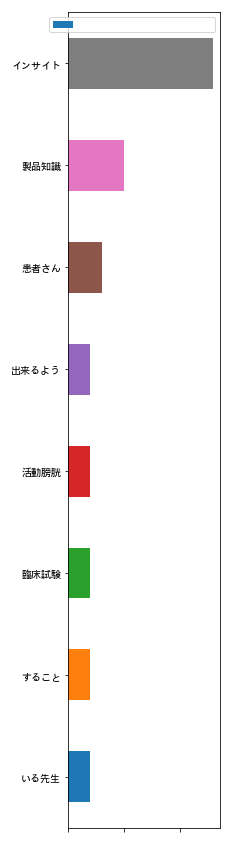

In [42]:
fig=plt.figure()
# ax1=fig.add_subplot(121)
tmp.sort_values(by='cnt', ascending=True).plot.barh( x='word', y='cnt',figsize=(6,15),subplots=True, layout=(1, 1), sharex=False)
# ax2=fig.add_subplot(122)
tmp2.sort_values(by='two_word_freq', ascending=True).plot.barh( x='two_word', y='two_word_freq',figsize=(6,15),subplots=True, layout=(1, 2), sharex=False)



In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

# Label with given captions, custom padding and annotate options
ax.bar_label(hbars, labels=['±%.2f' % e for e in error],
             padding=8, color='b', fontsize=14)
ax.set_xlim(right=16)

plt.show()

In [16]:
def ngram_func(ngram, word_list):
#     string_filterd =  text_series.sum().split()
#     dic = nltk.FreqDist(nltk.ngrams(string_filterd, ngram)).most_common(30)

    dic = nltk.FreqDist(nltk.ngrams(word_list, ngram)).most_common(30)
    ngram_df = pd.DataFrame(dic, columns=['ngram','count'])
    ngram_df.index = [' '.join(i) for i in ngram_df.ngram]
    ngram_df.drop('ngram',axis=1, inplace=True)
    return ngram_df
uni_ja = hv.Bars(ngram_func(1, word_list_1)[::-1]).opts(title="Japanese Unigram Count top-30", color="red", xlabel="Unigrams", ylabel="Count")
# uni_ja = hv.Bars(ngram_func(1, df_preprocessed['ja_preprocessed'])[::-1]).opts(title="Japanese Unigram Count top-30", color="red", xlabel="Unigrams", ylabel="Count")
# bi_ja = hv.Bars(ngram_func(2, df_preprocessed['ja_preprocessed'])[::-1]).opts(title="Japanese Bigram Count top-30", color="blue", xlabel="Bigrams", ylabel="Count")
(uni_ja + bi_ja).opts(opts.Bars(width=380, height=600,tools=['hover'],show_grid=True,invert_axes=True,fontsize={'title':10})).opts(shared_axes=False)

NameError: name 'word_list_1' is not defined


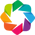

TypeError: string indices must be integers

In [17]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
uni_ja = hv.Bars(tmp[tmp['cnt'] > 8],'word','cnt').opts(title="Japanese Unigram Count", color="red")
# .opts(title="Japanese Unigram Count", color="red", xlabel="word", ylabel="cnt")
bi_ja = hv.Bars(tmp2,'two_word','two_word_freq')
# .opts(title="Japanese Bigram Count", color="blue", xlabel="two_word", ylabel="two_word_freq")
(uni_ja + bi_ja)
# (hv.Bars(tmp,'word','cnt')+hv.Bars(tmp2,'two_word','two_word_freq'))
# (hv.Bars(tmp,'word','cnt')+hv.Bars(tmp2,'two_word','two_word_freq')).opts(opts.Bars(width=380, height=600,tools=['hover'],show_grid=True,invert_axes=True,fontsize={'title':10})).opts(shared_axes=False)

In [ ]:
# tweet_combinations

In [20]:
vocab = {}
target_words = word_cnt_df[word_cnt_df['cnt'] > 3]['word'].as_matrix()
for word in target_words:
    if word not in vocab:
        vocab[word] = len(vocab)

re_vocab = {}
for word, i in vocab.items():
    re_vocab[i] = word
    
len(vocab)

31

In [64]:
# vocab
# re_vocab

In [66]:
# tweet_combinations

In [21]:
tweet_combinations = [list(itertools.combinations(words, 2)) for words in tweet_words]
combination_matrix = np.zeros((len(vocab), len(vocab)))

for tweet_comb in tweet_combinations:
    for comb in tweet_comb:
        if comb[0] in target_words and comb[1] in target_words:
            combination_matrix[vocab[comb[0]], vocab[comb[1]]] += 1
            combination_matrix[vocab[comb[1]], vocab[comb[0]]] += 1
        
for i in range(len(vocab)):
    combination_matrix[i, i] /= 2
        
combination_matrix

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  2., 17.,  4.,  3.,  1.,  2.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  2.,  0.,  2.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0., 17.,  2.,  4.,  3.,  1.,  2.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,

In [22]:
jaccard_matrix = 1 - distance.cdist(combination_matrix, combination_matrix, 'jaccard')
jaccard_matrix

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.1       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.16666667],
       [0.        , 1.        , 0.        , 0.        , 0.06666667,
        0.06666667, 0.06666667, 0.        , 0.05      , 0.        ,
        0.        , 0.        , 0.1       , 0.        , 0.        ,
        0.        , 0.11764706, 0.23076923, 0.09090909, 0.        ,
        0.07692308, 0.11764706, 0.        , 0.        , 0.18181818,
        0.1       , 0.08333333, 0.        , 0.        , 0.        ,
        0.11111111],
       [0.        , 0.        , 1.        , 0.14285714, 0.13333333,
        0.13333333, 0.06666667, 0.1       , 0.        , 0.        ,
      

In [23]:
nodes = []

for i in range(len(vocab)):
    for j in range(i+1, len(vocab)):
        jaccard = jaccard_matrix[i, j]
        if jaccard > 0:
            nodes.append([re_vocab[i], re_vocab[j], word_cnt[re_vocab[i]], word_cnt[re_vocab[j]], jaccard])
            
len(nodes)

309

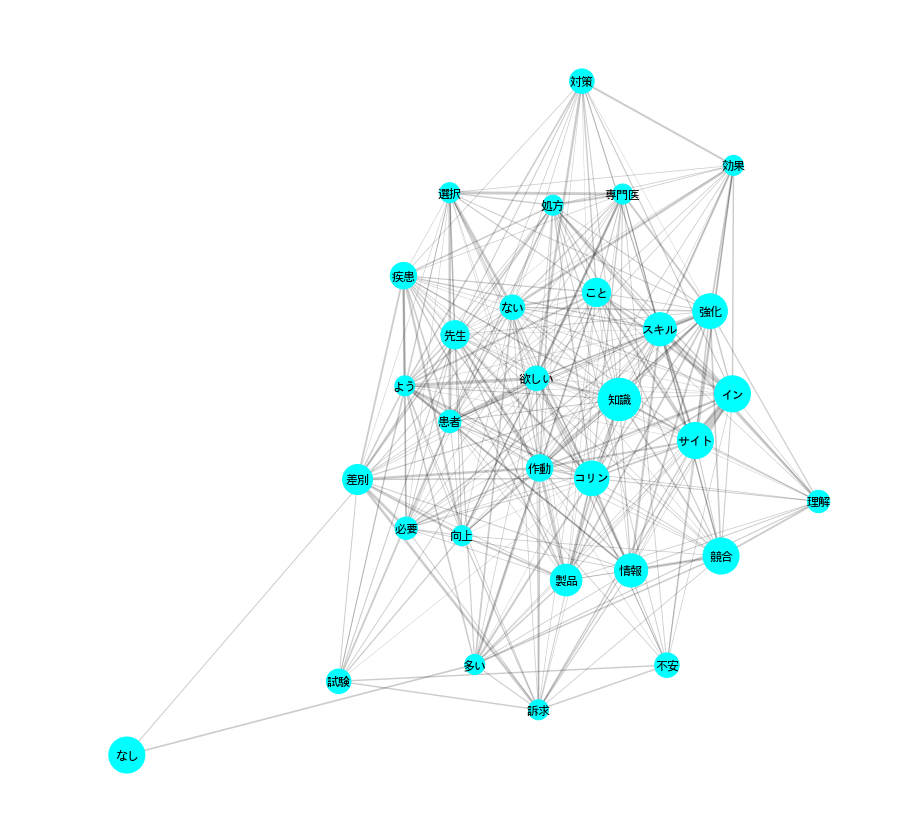

In [24]:
G = nx.Graph()
G.nodes(data=True)

for pair in nodes:
    node_x, node_y, node_x_cnt, node_y_cnt, jaccard = pair[0], pair[1], pair[2], pair[3], pair[4]
    if not G.has_node(node_x):
        G.add_node(node_x, count=node_x_cnt)
    if not G.has_node(node_y):
        G.add_node(node_y, count=node_y_cnt)
    if not G.has_edge(node_x, node_y):
        G.add_edge(node_x, node_y, weight=jaccard)
        
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.1)

node_size = [d['count']*100 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color='cyan', alpha=1.0, node_size=node_size)
nx.draw_networkx_labels(G, pos, fontsize=14, font_family='Droid Sans Japanese')

edge_width = [d['weight']*10 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='black', width=edge_width)

plt.axis('off')
plt.show()

In [109]:
# import WordCloud

ModuleNotFoundError: No module named 'WordCloud'

In [108]:
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# wc = WordCloud(max_words=2000,
#             max_font_size=40,
#             font_path='./fonts/simhei.ttf',
#             background_color='white',
#             random_state=42,
#             relative_scaling=0)
# wc.generate(col15_sentence_text)

OSError: cannot open resource

In [104]:
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# def word_cloud(text_list):
#     wc = WordCloud(max_words=2000,
#                 max_font_size=40,
#                 font_path='./fonts/simhei.ttf',
#                 background_color='white',
#                 random_state=42,
#                 relative_scaling=0)
#     wc.generate(text_list)
#     # Plot
#     plt.figure()
#     plt.axis('off')
#     plt.imshow(wc)
#     plt.show()
# word_cloud(one_word_list)

TypeError: expected string or bytes-like object